<span style="font-size: 32pt; font-family: 'Times New Roman'; color: blue; "> Notebook to viz FaIR output </span> 

I am currently running this notebook to viz the results from running FaIR `project` from within a sandbox. 
You will need to use the `fair_env` to run the notebook. 

### Notebook Env:  <mark> fair_env</mark>
located at `/Users/pk695/werk.M2/FACTS_dev/2401_RFF.SPs/facts_development/envs/fair_env/bin`   
activate
- Terminal `source /Users/pk695/werk.M2/FACTS_dev/2401_RFF.SPs/facts_development/envs/fair_env/bin/activate`   
- Jupyter: Change the kernel in the toolbar to run the notebook. 

  <details>
  <summary>If the kernel does not appear:</summary>

  - Restart and install the new kernel using:
    ```bash
    ipython kernel install --user --name=fair_env
    ```
  - If that does not work, install `ipykernel`:
    ```bash
    pip install ipykernel
    ```
  </details>


In [1]:
import os
import pickle
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import plot_facts as fun

1. `rffemissions` has 3 gasses - 'C' 'CH4' 'N2' , IDX (0,1,2)

1. `emis` and `rffemfull_array` have at "C" ,"CH4" ,"N2O" ,"N2" , IDX (1,3,4,4)
    * first column is time. 

<span style="font-size: 22pt; font-family: 'Times New Roman'; color: blue; "> Load FaIR data at the <span style="background-color: yellow;"> project </span>  stage </span> 

In [2]:
pathDICT = {
    "debug_Path" : "/Users/pk695/werk.M2/FACTS_dev/2401_RFF.SPs/facts_development/facts/experiments.RFF.SPs/debug_rffLL_project",   
}

rffemfull_array, rff_sp_array, temps, deeptemps, ohcs = fun.load_data_project(pathDICT)

emis, rffemissions, REFERENCE_YEAR, t = fun.load_data_preprocess(pathDICT)


In [3]:
print('\n <======>')
print('rffemissions = ',rffemissions)
print('<======>')
print('emis shape:: ',emis.shape)
print('<======>')
print(f"rffemfull_array shape:: {rffemfull_array.shape}")
print('<======>')


 <======>
rffemissions =  <xarray.Dataset> Size: 68MB
Dimensions:    (rff_sp: 10000, Year: 281, gas: 3)
Coordinates:
  * rff_sp     (rff_sp) int64 80kB 1 2 3 4 5 6 ... 9996 9997 9998 9999 10000
  * Year       (Year) int64 2kB 2020 2021 2022 2023 2024 ... 2297 2298 2299 2300
  * gas        (gas) object 24B 'C' 'CH4' 'N2'
Data variables:
    emissions  (gas, rff_sp, Year) float64 67MB 11.08 11.21 ... 0.1785 0.1785
Attributes:
    Description:      A compilation of 3-ghg gas emissions files from RFF con...
    Version:          v2. These emissions current as of end of Jan/early Feb ...
    Emissions Units:  C: Gt/C, CH4: Mt/CH4, N2O: Mt/N2
    Source files:     impactlab-data/gcp/integration/RFF-SP/v2/emissions/
<======>
emis shape::  (751, 40)
<======>
rffemfull_array shape:: (10, 751, 40)
<======>


---

<span style="font-size: 32pt; font-family: 'Times New Roman'; color: blue; "> Plot:: FaIR IP  <mark>emissions </mark> </span> 

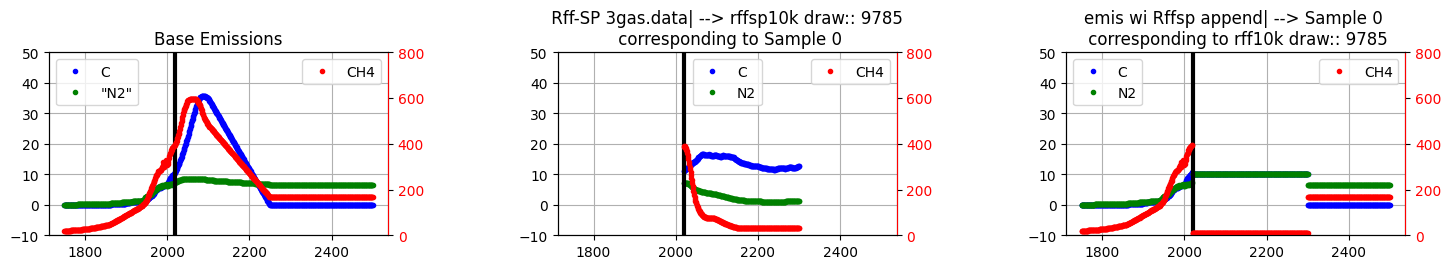

In [4]:
fun.plot_grouped_dataset(emis, rffemissions, rffemfull_array, rff_sp_array, 0)

sample=0


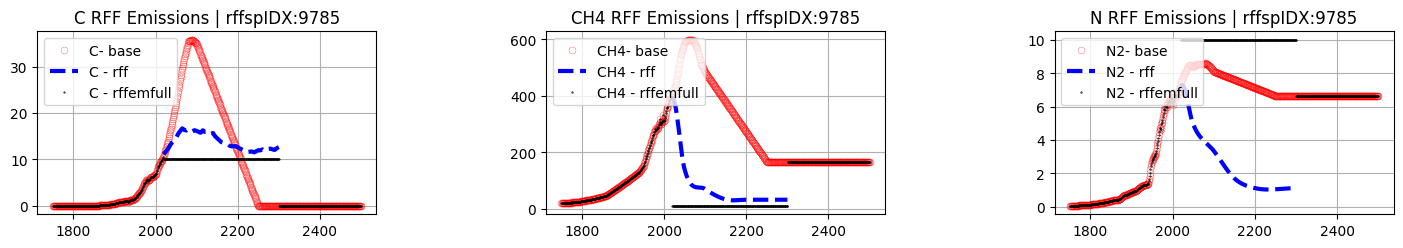

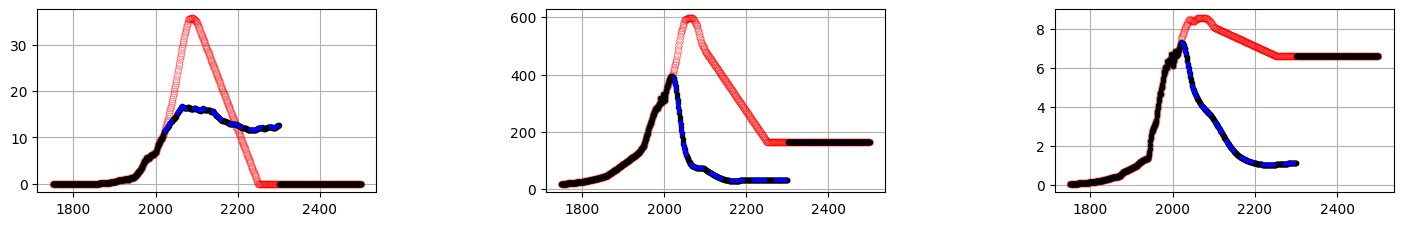

sample=1


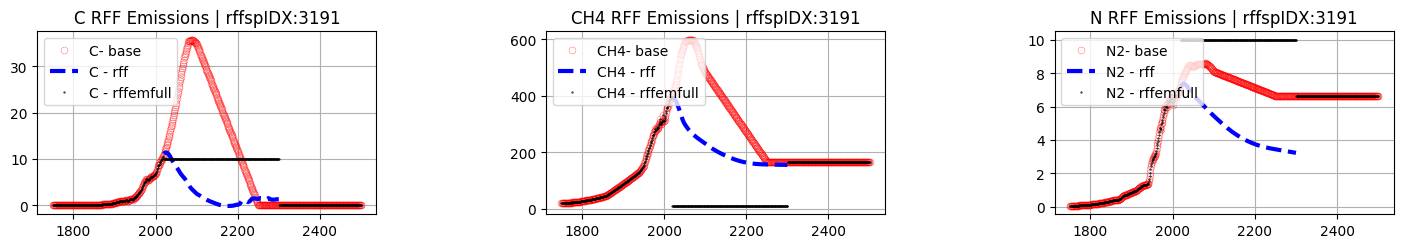

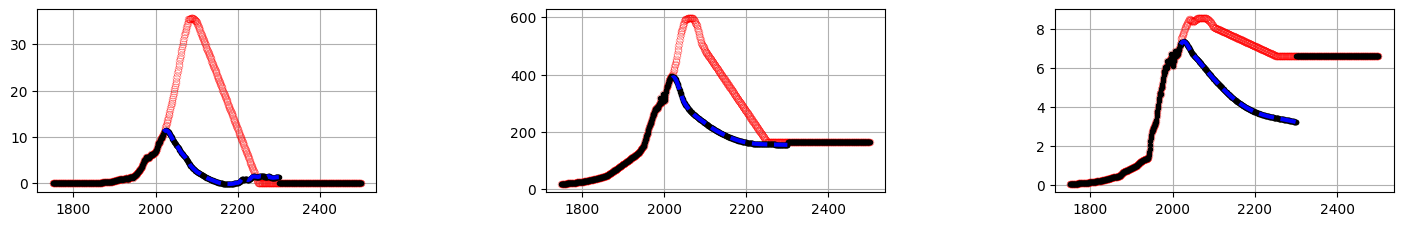

sample=2


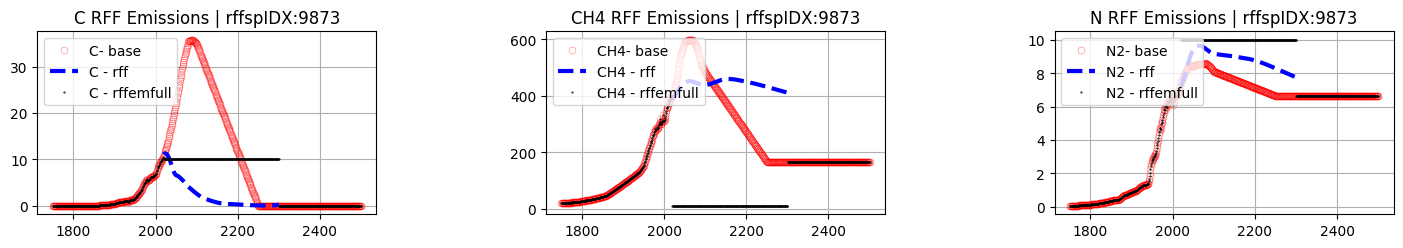

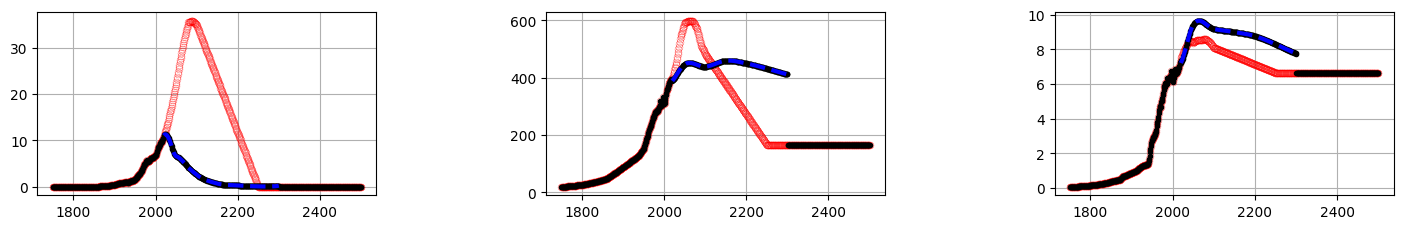

sample=3


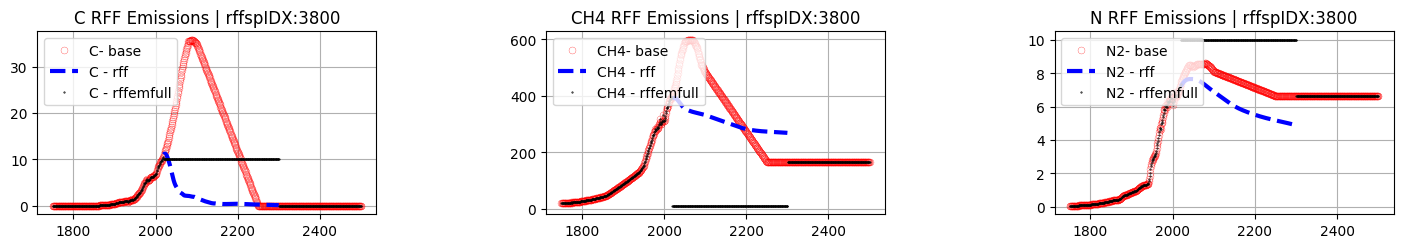

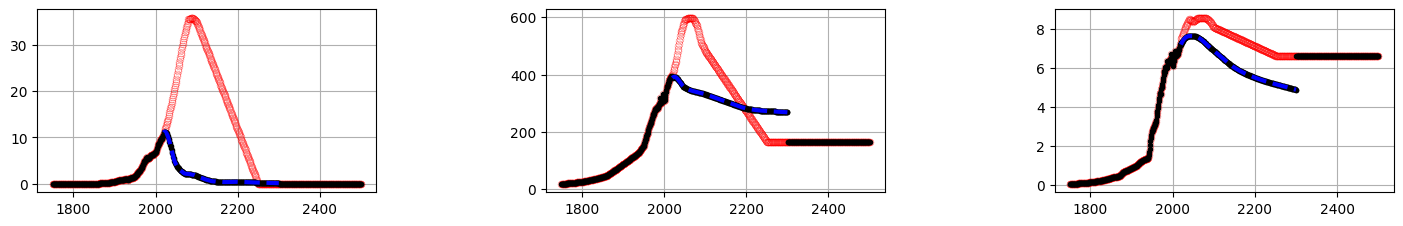

sample=4


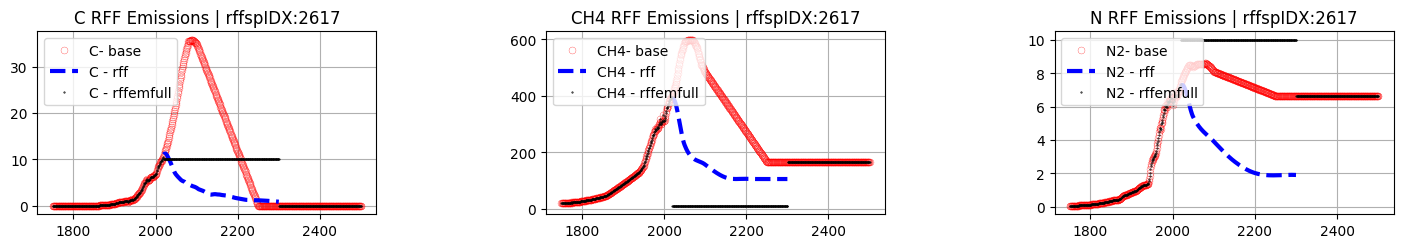

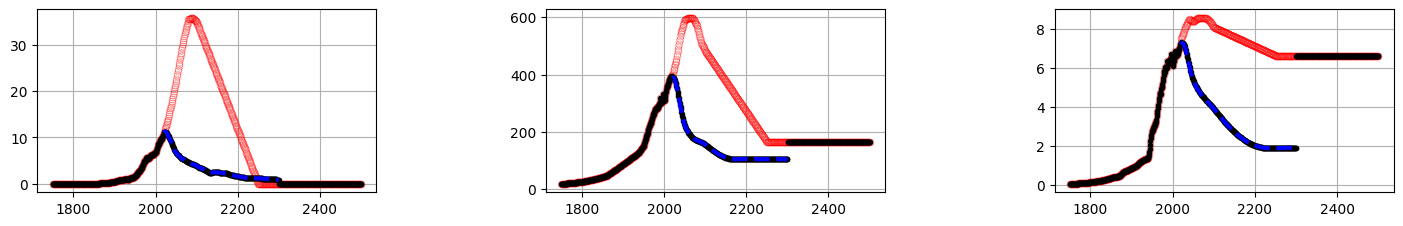

sample=5


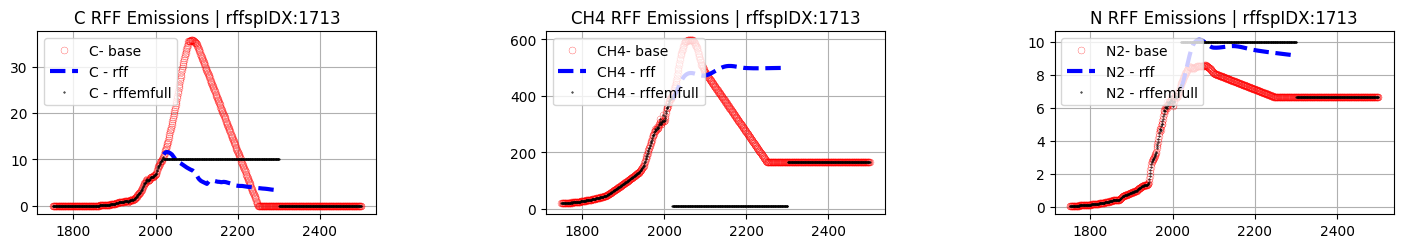

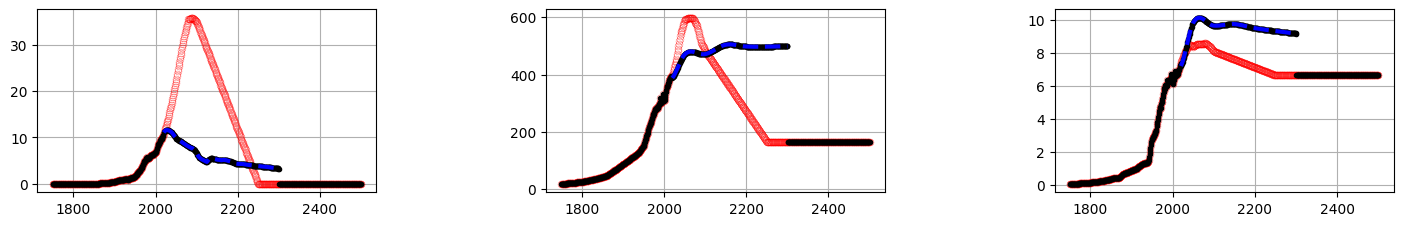

sample=6


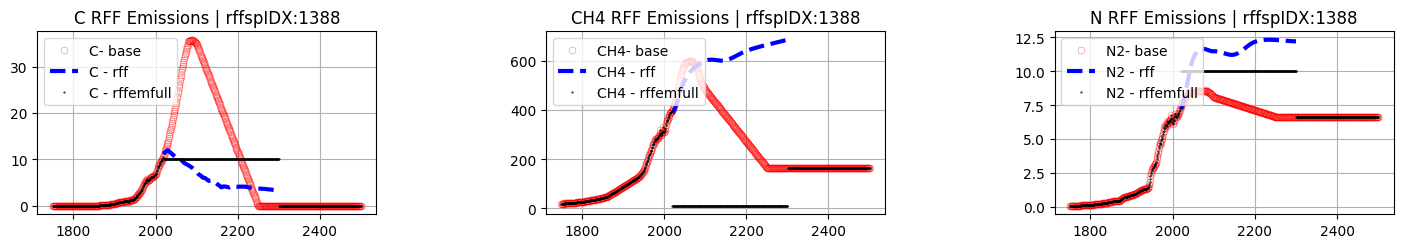

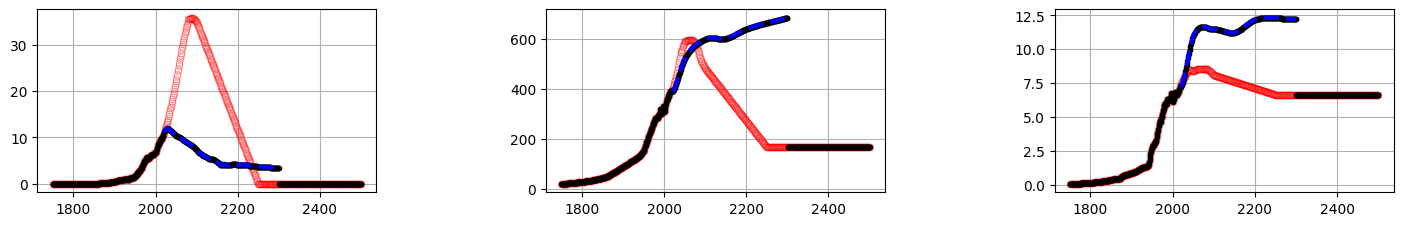

sample=7


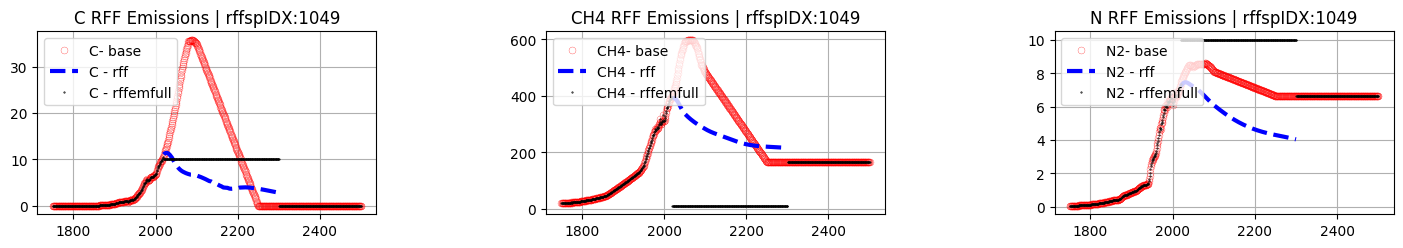

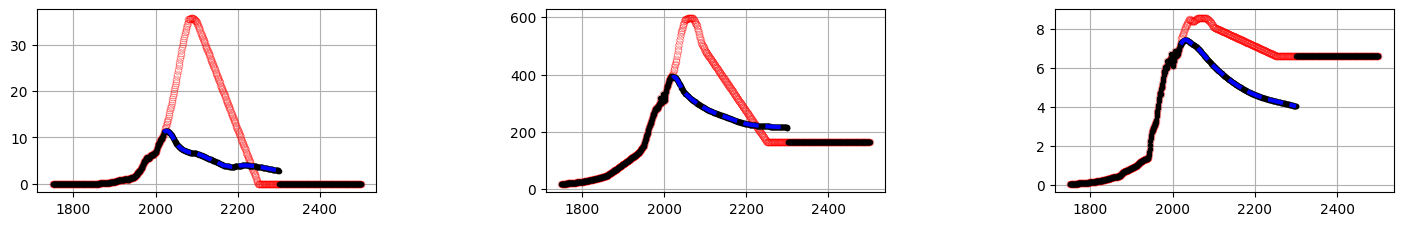

sample=8


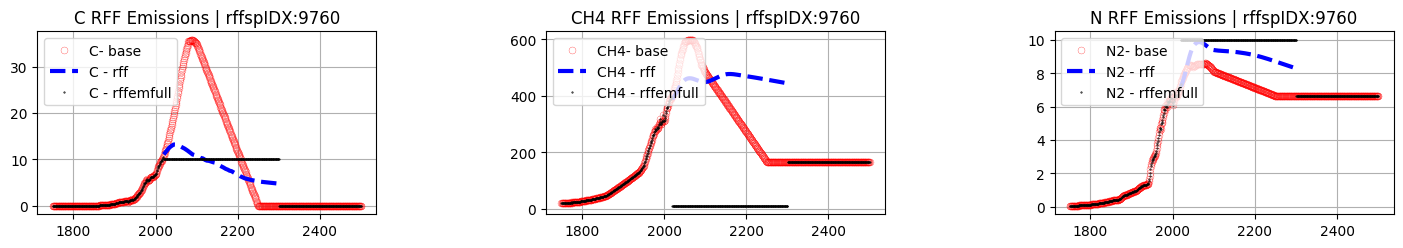

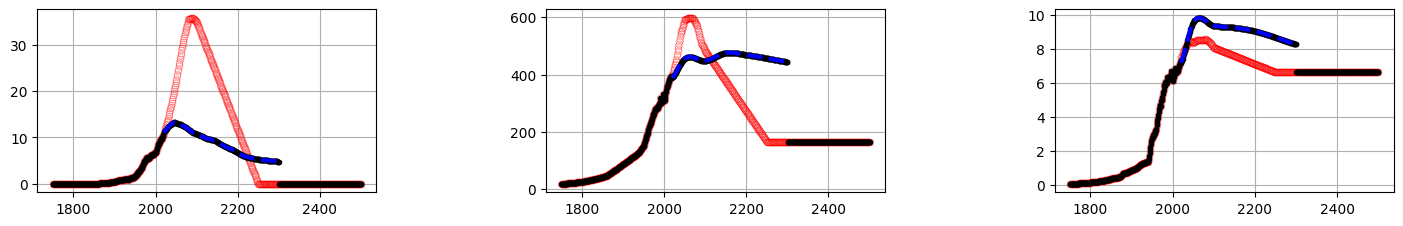

sample=9


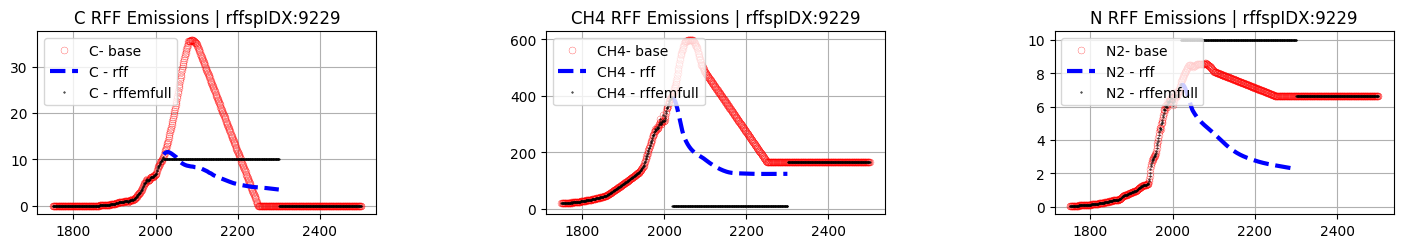

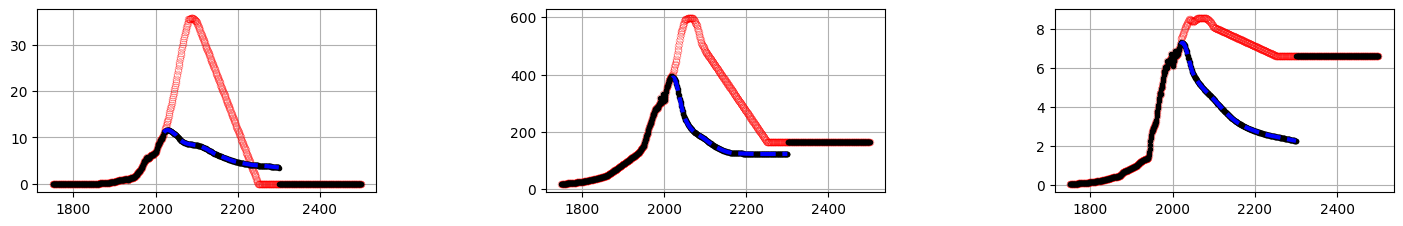

In [5]:
# fun.plot_grouped_gas(emis, rffemissions, rffemfull_array, rff_sp_array, 0)
for ii in range(10):
    print(f"sample={ii}")
    fun.plot_grouped_gas(emis, rffemissions, rffemfull_array, rff_sp_array, ii)
    plt.show(block=False)
    fun.plot_grouped_gas_nbk(emis, rffemissions, rffemfull_array, rff_sp_array, REFERENCE_YEAR, ii)
    plt.show(block=False)


---

<span style="font-size: 32pt; font-family: 'Times New Roman'; color: blue; "> Recalc above in nbk  </span> 

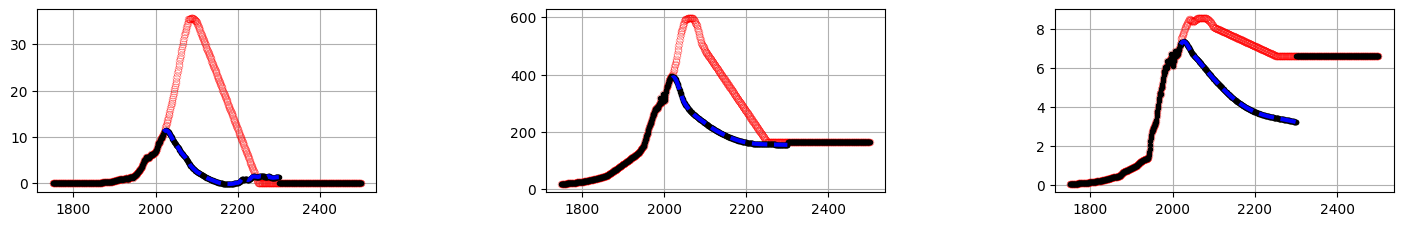

In [6]:
fun.plot_grouped_gas_nbk(emis, rffemissions, rffemfull_array, rff_sp_array, REFERENCE_YEAR, 1)

---

<span style="font-size: 32pt; font-family: 'Times New Roman'; color: blue; "> 3 Gas  </span> 

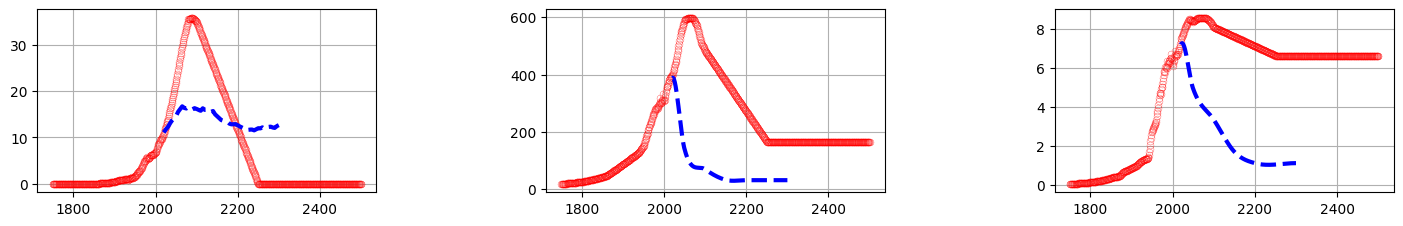

In [7]:
fun.plot_3_gas(emis,rffemissions, rff_sp_array, 0)

---

<span style="font-size: 32pt; font-family: 'Times New Roman'; color: red; "> Check gas tract from OG Emissions Data  </span> 

In [ ]:
pathOGemis="/Users/pk695/werk.M2/FACTS_dev/2401_RFF.SPs/cil_rff/_data/CIL_IP/rff-sp_emissions_all_gases.nc"
nc_OGrffemis = xr.open_dataset(pathOGemis , engine="netcdf4")
nc_OGrffemis

In [ ]:
rffspIDX

In [ ]:
plt.plot(nc_OGrffemis["Year"], nc_OGrffemis["emissions"][0,rffspIDX,:])

---

<span style="font-size: 32pt; font-family: 'Times New Roman'; color: red; "> Cumulative Emissions  </span> 

In [ ]:

selected_gas = "C"  # Replace with your desired gas
subset = rffemissions["emissions"].sel(gas=selected_gas, Year=slice(2020, 2100))
subset_Year_values = subset.coords["Year"].values

# Compute the cumulative sum over the 'Year' dimension
cumulative_emissions = subset.cumsum(dim="Year")

# Display the result
#print(cumulative_emissions)

# Plot
# cumulative_emissions.plot(label=f"Cumulative Emissions for {selected_gas}")
# plt.title("Cumulative Emissions (2020–2100)")
# plt.xlabel("Year")
# plt.ylabel("Cumulative Emissions")
# plt.legend()
# plt.show()

# # plt.plot(cumulative_emissions[1:100,:])


# Sort cumulative_emissions for 2100
year_index_2100 = np.where(subset_Year_values == 2100)[0][0]    
emissions_2100 = cumulative_emissions[:, year_index_2100]
sorted_indexes = np.argsort(emissions_2100)
sorted_indexes
# sorted_rff_sp_labels = rff_sp[sorted_indexes]


# plt.figure(figsize=(80, 5))
# plt.plot(sorted_indexes, '-')


# Latin Line
rng = np.random.default_rng(1234)

def LatinLine(sorted_array, num_samples, rng):
    # Total number of elements in the sorted array
    total_elements = len(sorted_array)
    
    # Divide the sorted array into `num_samples` intervals
    intervals = np.linspace(0, total_elements, num_samples + 1).astype(int)
    
    # Randomly sample one index from each interval
    sampled_indexes = [
        rng.integers(intervals[i], intervals[i + 1]) for i in range(num_samples)
    ]
    
    # Retrieve sampled values
    sampled_values = sorted_array[sampled_indexes]
    
    return sampled_indexes, sampled_values

# Example usage
sorted_array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
num_samples = 3
sampled_indexes, sampled_values = LatinLine(sorted_array, num_samples, rng)

print("Sampled indexes:", sampled_indexes)
print("Sampled values:", sampled_values)


---

<span style="font-size: 32pt; font-family: 'Times New Roman'; color: blue; "> Plot:: FaIR OP  </span> 

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].plot(t,deeptemps[1,:],'-b',label='Deep Ocean Temp'); axs[0].grid(True)
axs[1].plot(t,ohcs[1815,:],'--b', label='Ocean Heat Content'); axs[1].grid(True)
axs[2].plot(t,temps[1, :], '-r', label='temps'); axs[2].grid(True)
axs[3].plot(rff_sp_array[:], '*', label='rff sps IDX'); axs[3].grid(True)

axs[0].legend()  ; axs[1].legend(); axs[2].legend() ; axs[3].legend()


In [ ]:
rff_sp_array[:]

---

<span style="font-size: 12pt; font-family: 'Times New Roman'; color: blue; "> Plot  </span> 

In [ ]:
nsamps = 9999 
nsims = 2237
rng = np.random.default_rng(1234)
if nsamps > nsims:
	run_idx = np.arange(nsims)
	sample_idx = rng.choice(nsims, nsamps, nsamps>nsims)
else:
	run_idx = rng.choice(nsims, nsamps, nsamps>nsims)
	sample_idx = np.arange(nsamps)


In [ ]:
run_idx

In [ ]:
plt.plot(sample_idx,'.')
sample_idx.unique

In [ ]:
index_counts = np.bincount(sample_idx, minlength=nsims)
print("Index counts:", index_counts)

In [ ]:
nc=xr.open_dataset("/Users/pk695/werk.M2/FACTS_dev/2401_RFF.SPs/facts_development/facts/experiments.RFF.SPs/global.ssp245/output/global.ssp245.temperature.fair.temperature_gsat.nc")

In [ ]:
nc

In [ ]:
no_data_indices = []  # To store indices where no data exists

for n in range(9999):  # Loop from n=0 to n=998
    # Check if all values in var[n, :, 0] are NaN
    if nc["surface_temperature"][n, :, 0].isnull().all():
        no_data_indices.append(n)  # Store index where no data exists
        print(f"No data for n={n}")
    else:
        continue  # Skip to the next n if data exists


In [ ]:
python3 fair_rffLL_project.py --pipeline_id rff.LL.temperature.fair.rffLL

---

# Gas Species 

In [ ]:
species = [
    'CO2|MAGICC Fossil and Industrial', 'CO2|MAGICC AFOLU', 'CH4', 'N2O', 'Sulfur', 'CO', 
    'VOC', 'NOx', 'BC', '|OC', 'NH3', 'CF4', 'C2F6', 'C6F14', 'HFC23', 'HFC32', 
    'HFC4310mee', 'HFC125', 'HFC134a', 'HFC143a', 'HFC227ea', 'HFC245fa', 'SF6', 
    'CFC11', 'CFC12', 'CFC113', 'CFC114', 'CFC115', 'CCl4', 'CH3CCl3', 'HCFC22', 
    'HCFC141b', 'HCFC142b', 'Halon1211', 'Halon1202', 'Halon1301', 'Halon2402', 
    'CH3Br', '|CH3Cl'
]

list_of_emissions_species = [
    'CO2_Fossil', 'CO2_Land', 'CH4', 'N2O', 'SOx', 'CO', 'NMVOC', 'NOx', 'BC', 'OC', 'NH3',
    'CF4', 'C2F6', 'C6F14', 'HFC23', 'HFC32', 'HFC4310mee', 'HFC125', 'HFC134a', 'HFC143a',
    'HFC227ea', 'HFC245fa', 'SF6', 'CFC11', 'CFC12', 'CFC113', 'CFC114', 'CFC115', 
    'CARB_TET', 'MCF', 'HCFC22', 'HCFC141b', 'HCFC142b', 'Halon1211', 'Halon1202', 
    'Halon1301', 'Halon2402', 'CH3Br', 'CH3Cl'
]

# Ensure both lists are of the same length
assert len(species) == len(list_of_emissions_species), "Lists must be of the same length"

# Generate the markdown table
table_md = "| Index | Species                               | Emissions Species     |\n"
table_md += "|-------|---------------------------------------|------------------------|\n"
for i, (sp, es) in enumerate(zip(species, list_of_emissions_species)):
    table_md += f"| {i+1}     | {sp:<35} | {es:<20} |\n"

# Print the markdown table
print(table_md)

# Display the total count
print(f"\n**Total species count: {len(species)}**")


##### Full list

In [ ]:
variables = [
    'Emissions|BC', 'Emissions|CH4', 'Emissions|CO', 'Emissions|CO2',
    'Emissions|CO2|MAGICC AFOLU', 'Emissions|CO2|MAGICC Fossil and Industrial',
    'Emissions|F-Gases|HFC|HFC125', 'Emissions|F-Gases|HFC|HFC134a',
    'Emissions|F-Gases|HFC|HFC143a', 'Emissions|F-Gases|HFC|HFC227ea',
    'Emissions|F-Gases|HFC|HFC23', 'Emissions|F-Gases|HFC|HFC245fa',
    'Emissions|F-Gases|HFC|HFC32', 'Emissions|F-Gases|HFC|HFC4310mee',
    'Emissions|F-Gases|PFC|C2F6', 'Emissions|F-Gases|PFC|C6F14',
    'Emissions|F-Gases|PFC|CF4', 'Emissions|F-Gases|SF6',
    'Emissions|Montreal Gases|CCl4', 'Emissions|Montreal Gases|CFC|CFC11',
    'Emissions|Montreal Gases|CFC|CFC113', 'Emissions|Montreal Gases|CFC|CFC114',
    'Emissions|Montreal Gases|CFC|CFC115', 'Emissions|Montreal Gases|CFC|CFC12',
    'Emissions|Montreal Gases|CH3Br', 'Emissions|Montreal Gases|CH3CCl3',
    'Emissions|Montreal Gases|CH3Cl', 'Emissions|Montreal Gases|HCFC141b',
    'Emissions|Montreal Gases|HCFC142b', 'Emissions|Montreal Gases|HCFC22',
    'Emissions|Montreal Gases|Halon1202', 'Emissions|Montreal Gases|Halon1211',
    'Emissions|Montreal Gases|Halon1301', 'Emissions|Montreal Gases|Halon2402',
    'Emissions|N2O', 'Emissions|NH3', 'Emissions|NOx', 'Emissions|OC',
    'Emissions|Sulfur', 'Emissions|VOC', 'Emissions|BC|MAGICC AFOLU',
    'Emissions|BC|MAGICC AFOLU|Agricultural Waste Burning',
    'Emissions|BC|MAGICC AFOLU|Agriculture', 'Emissions|BC|MAGICC AFOLU|Forest Burning',
    'Emissions|BC|MAGICC AFOLU|Grassland Burning', 'Emissions|BC|MAGICC AFOLU|Peat Burning',
    'Emissions|BC|MAGICC Fossil and Industrial', 'Emissions|BC|MAGICC Fossil and Industrial|Aircraft',
    'Emissions|BC|MAGICC Fossil and Industrial|Energy Sector',
    'Emissions|BC|MAGICC Fossil and Industrial|Industrial Sector',
    'Emissions|BC|MAGICC Fossil and Industrial|International Shipping',
    'Emissions|BC|MAGICC Fossil and Industrial|Residential Commercial Other',
    'Emissions|BC|MAGICC Fossil and Industrial|Solvents Production and Application',
    'Emissions|BC|MAGICC Fossil and Industrial|Transportation Sector',
    'Emissions|BC|MAGICC Fossil and Industrial|Waste', 'Emissions|CH4|MAGICC AFOLU',
    'Emissions|CH4|MAGICC AFOLU|Agricultural Waste Burning',
    'Emissions|CH4|MAGICC AFOLU|Agriculture', 'Emissions|CH4|MAGICC AFOLU|Forest Burning',
    'Emissions|CH4|MAGICC AFOLU|Grassland Burning', 'Emissions|CH4|MAGICC AFOLU|Peat Burning',
    'Emissions|CH4|MAGICC Fossil and Industrial',
    'Emissions|CH4|MAGICC Fossil and Industrial|Energy Sector',
    'Emissions|CH4|MAGICC Fossil and Industrial|Industrial Sector',
    'Emissions|CH4|MAGICC Fossil and Industrial|International Shipping',
    'Emissions|CH4|MAGICC Fossil and Industrial|Residential Commercial Other',
    'Emissions|CH4|MAGICC Fossil and Industrial|Solvents Production and Application',
    'Emissions|CH4|MAGICC Fossil and Industrial|Transportation Sector',
    'Emissions|CH4|MAGICC Fossil and Industrial|Waste',
    'Emissions|CO2|MAGICC Fossil and Industrial|Aircraft',
    'Emissions|CO2|MAGICC Fossil and Industrial|Energy Sector',
    'Emissions|CO2|MAGICC Fossil and Industrial|Industrial Sector',
    'Emissions|CO2|MAGICC Fossil and Industrial|International Shipping',
    'Emissions|CO2|MAGICC Fossil and Industrial|Residential Commercial Other',
    'Emissions|CO2|MAGICC Fossil and Industrial|Solvents Production and Application',
    'Emissions|CO2|MAGICC Fossil and Industrial|Transportation Sector',
    'Emissions|CO2|MAGICC Fossil and Industrial|Waste', 'Emissions|CO|MAGICC AFOLU',
    'Emissions|CO|MAGICC AFOLU|Agricultural Waste Burning',
    'Emissions|CO|MAGICC AFOLU|Agriculture', 'Emissions|CO|MAGICC AFOLU|Forest Burning',
    'Emissions|CO|MAGICC AFOLU|Grassland Burning', 'Emissions|CO|MAGICC AFOLU|Peat Burning',
    'Emissions|CO|MAGICC Fossil and Industrial', 'Emissions|CO|MAGICC Fossil and Industrial|Aircraft',
    'Emissions|CO|MAGICC Fossil and Industrial|Energy Sector',
    'Emissions|CO|MAGICC Fossil and Industrial|Industrial Sector',
    'Emissions|CO|MAGICC Fossil and Industrial|International Shipping',
    'Emissions|CO|MAGICC Fossil and Industrial|Residential Commercial Other',
    'Emissions|CO|MAGICC Fossil and Industrial|Solvents Production and Application',
    'Emissions|CO|MAGICC Fossil and Industrial|Transportation Sector',
    'Emissions|CO|MAGICC Fossil and Industrial|Waste', 'Emissions|F-Gases|HFC|HFC152a',
    'Emissions|F-Gases|HFC|HFC236fa', 'Emissions|F-Gases|HFC|HFC365mfc', 'Emissions|F-Gases|NF3',
    'Emissions|F-Gases|PFC|C3F8', 'Emissions|F-Gases|PFC|C4F10', 'Emissions|F-Gases|PFC|C5F12',
    'Emissions|F-Gases|PFC|C7F16', 'Emissions|F-Gases|PFC|C8F18', 'Emissions|F-Gases|PFC|cC4F8',
    'Emissions|F-Gases|SO2F2', 'Emissions|Montreal Gases|CH2Cl2', 'Emissions|Montreal Gases|CHCl3',
    'Emissions|N2O|MAGICC AFOLU', 'Emissions|N2O|MAGICC Fossil and Industrial',
    'Emissions|NH3|MAGICC AFOLU', 'Emissions|NH3|MAGICC AFOLU|Agricultural Waste Burning',
    'Emissions|NH3|MAGICC AFOLU|Agriculture', 'Emissions|NH3|MAGICC AFOLU|Forest Burning',
    'Emissions|NH3|MAGICC AFOLU|Grassland Burning', 'Emissions|NH3|MAGICC AFOLU|Peat Burning',
    'Emissions|NH3|MAGICC Fossil and Industrial', 'Emissions|NH3|MAGICC Fossil and Industrial|Aircraft',
    'Emissions|NH3|MAGICC Fossil and Industrial|Energy Sector',
    'Emissions|NH3|MAGICC Fossil and Industrial|Industrial Sector',
    'Emissions|NH3|MAGICC Fossil and Industrial|International Shipping',
    'Emissions|NH3|MAGICC Fossil and Industrial|Residential Commercial Other',
    'Emissions|NH3|MAGICC Fossil and Industrial|Solvents Production and Application',
    'Emissions|NH3|MAGICC Fossil and Industrial|Transportation Sector',
    'Emissions|NH3|MAGICC Fossil and Industrial|Waste', 'Emissions|NOx|MAGICC AFOLU',
    'Emissions|NOx|MAGICC AFOLU|Agricultural Waste Burning',
    'Emissions|NOx|MAGICC AFOLU|Agriculture', 'Emissions|NOx|MAGICC AFOLU|Forest Burning',
    'Emissions|NOx|MAGICC AFOLU|Grassland Burning', 'Emissions|NOx|MAGICC AFOLU|Peat Burning',
    'Emissions|NOx|MAGICC Fossil and Industrial', 'Emissions|NOx|MAGICC Fossil and Industrial|Aircraft',
]

# Generate the markdown table
table_md = "| Index | Variable                             |\n"
table_md += "|-------|--------------------------------------|\n"

for i, var in enumerate(variables):
    table_md += f"| {i}     | {var} |\n"

# Print the markdown table
print(table_md)